##Dynamic Programming 2 – Week 6
###Angel Mateo González Bejarano 
###Oscar Alejandro Gómez Suarez

###Maximum Amount of Gold
You are given a set of bars of gold and your goal is to take as much gold as possible into
your bag. There is just one copy of each bar and for each bar you can either take it or not
(hence you cannot take a fraction of a bar). \\
Given 𝑛 gold bars, find the maximum weight of gold that fits into a bag of capacity W.



In [ ]:
import java.util.*;

public class Knapsack {

    static int optimalWeight(int W, int[] w) {
      int w_length = w.length;  
      int[][] matriz = new int[w_length + 1][W + 1];
      for(int i = 0; i < w_length + 1; i++){
        for(int j = 0; j < W + 1; j++){
          if(i == 0 || j == 0){
            matriz[i][j] = 0;
          }else if(w[i-1] <= j){
            matriz[i][j] = Math.max(w[i - 1] + matriz[i - 1][j - w[i-1]], matriz[i - 1][j]);
          }else{
            matriz[i][j] = matriz[i - 1][j];
          }
        }
      }
     
      /*for(int i = 0; i < w_length +1; i++){
        for(int j = 0; j < W + 1; j++){
          System.out.print("| " + matriz[i][j] + " | ");
        }
        System.out.println(); 
      } */
      return matriz[w_length][W];
    }

    public static void main(String[] args) {
        Scanner scanner = new Scanner(System.in);
        int W, n;
        W = scanner.nextInt();
        n = scanner.nextInt();
        int[] w = new int[n];
        for (int i = 0; i < n; i++) {
            w[i] = scanner.nextInt();
        }
        System.out.println(optimalWeight(W, w));
        scanner.close();
    }
}


###Maximum Value of an Arithmetic Expression

In this problem, your goal is to add parentheses to a given arithmetic
expression to maximize its value. \\
Find the maximum value of an arithmetic expression by specifying the order of applying its arithmetic
operations using additional parentheses.


In [ ]:
import java.util.Scanner;


public class PlacingParentheses {

    private static long[] minAndMax(int i , int j, long[][] m, long[][] M, String exp){
        long min = Integer.MAX_VALUE;
        long max = Integer.MIN_VALUE;

        long[] res = {min, max};

        for(int k = i; k < j ; k++){
            long a = eval(M[i][k], M[k + 1][j], exp.charAt((2 * k) + 1));
            long b = eval(M[i][k], m[k + 1][j], exp.charAt((2 * k) + 1));
            long c = eval(m[i][k], M[k + 1][j], exp.charAt((2 * k) + 1));
            long d = eval(m[i][k], m[k + 1][j], exp.charAt((2 * k) + 1));

            min = Math.min(min,Math.min(a, Math.min(b, Math.min(c, d))));
            max = Math.max(max,Math.max(a, Math.max(b, Math.max(c, d))));
        }
        res[0] = min;
        res[1] = max;
        return res;
    }

    private static long getMaximValue(String exp) {
        int longi  = exp.length();
        int num_l = (longi+1)/2;
        long[][] m = new long[num_l][num_l];
        long[][] M = new long[num_l][num_l];


        for(int i = 0; i < num_l; i++){
            for(int j = 0; j < num_l; j++){
                m[i][j] = 0;
                M[i][j] = 0;
            }
        }

        for(int i = 0; i < num_l; i++){
            m[i][i] = Character.getNumericValue(exp.charAt(2* i));
            M[i][i] = Character.getNumericValue(exp.charAt(2* i));
        }

        for(int s = 0; s < num_l - 1; s++){
            for(int i = 0; i < num_l - s - 1; i++){
                int j = s + i + 1;
                long[] min_max = minAndMax(i, j, m, M, exp);
                m[i][j] = min_max[0];
                M[i][j] = min_max[1];
            }
        }
        /*
        System.out.println("Matrix Max");
        for(int i = 0; i < num_l; i++){
            for(int j = 0; j < num_l ; j++){
              System.out.print("| " + M[i][j] + " | ");
            }
            System.out.println(); 
        }

        System.out.println("Matrix Min");
        for(int i = 0; i < num_l; i++){
            for(int j = 0; j < num_l ; j++){
              System.out.print("| " + m[i][j] + " | ");
            }
            System.out.println(); 
        }
        */
        return M[0][num_l -1];
    }

    private static long eval(long a, long b, char op) {
        if (op == '+') {
            return a + b;
        } else if (op == '-') {
            return a - b;
        } else if (op == '*') {
            return a * b;
        } else {
            assert false;
            return 0;
        }
    }

    public static void main(String[] args) {
        Scanner scanner = new Scanner(System.in);
        String exp = scanner.next();
        System.out.println(getMaximValue(exp));
        scanner.close();
    }
}



Prueba aprobación. 

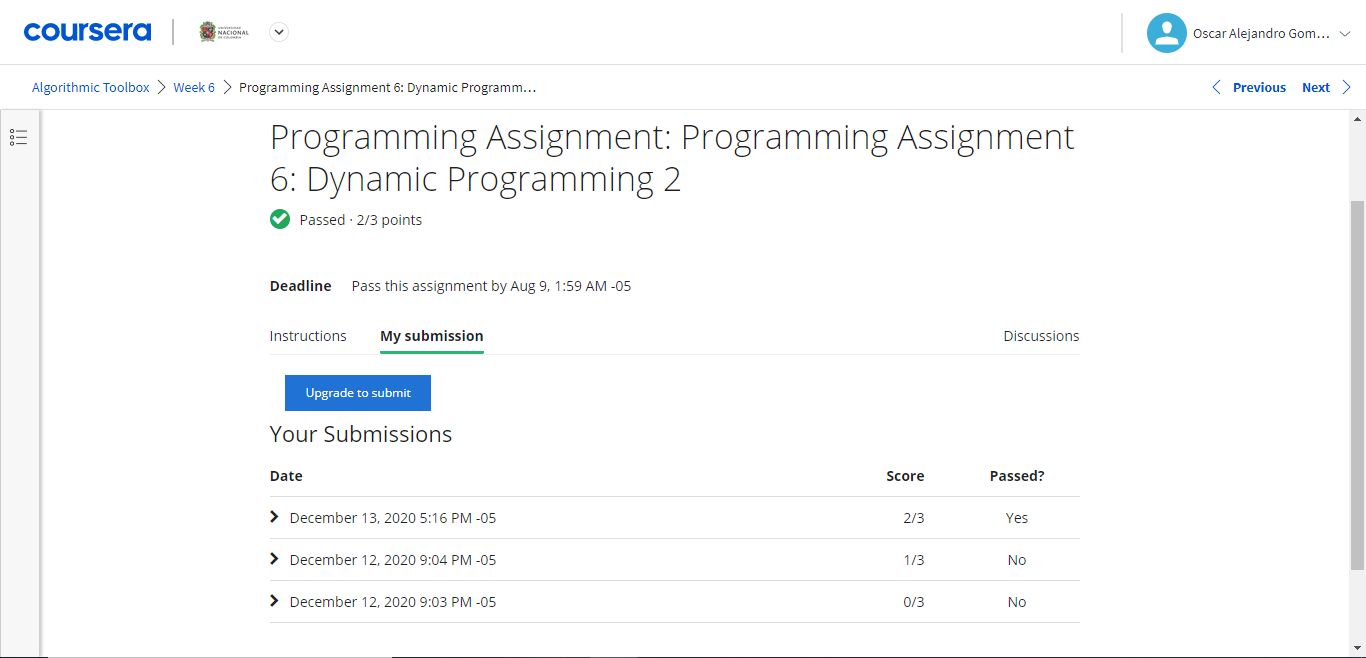